In [7]:
from google.colab import files
uploaded = files.upload()

Saving student_lifestyle_dataset.csv to student_lifestyle_dataset.csv


In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("student_lifestyle_dataset.csv")

# Display first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())


   Student_ID  Study_Hours_Per_Day  Extracurricular_Hours_Per_Day  \
0           1                  6.9                            3.8   
1           2                  5.3                            3.5   
2           3                  5.1                            3.9   
3           4                  6.5                            2.1   
4           5                  8.1                            0.6   

   Sleep_Hours_Per_Day  Social_Hours_Per_Day  Physical_Activity_Hours_Per_Day  \
0                  8.7                   2.8                              1.8   
1                  8.0                   4.2                              3.0   
2                  9.2                   1.2                              4.6   
3                  7.2                   1.7                              6.5   
4                  6.5                   2.2                              6.6   

    GPA Stress_Level  
0  2.99     Moderate  
1  2.75          Low  
2  2.67          Low  
3  2.8

# **TRAIN-TEST SPLIT**

In [9]:
# TRAIN-SPLIT
X = df.drop('Stress_Level', axis=1)
y = df['Stress_Level']

#Split into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (1600, 7)
Testing set size: (400, 7)


In [12]:
df

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High
...,...,...,...,...,...,...,...,...
1995,1996,6.5,0.2,7.4,2.1,7.8,3.32,Moderate
1996,1997,6.3,2.8,8.8,1.5,4.6,2.65,Moderate
1997,1998,6.2,0.0,6.2,0.8,10.8,3.14,Moderate
1998,1999,8.1,0.7,7.6,3.5,4.1,3.04,High


# **MODEL BUILDING**

In [10]:
#MODEL BUILDING
# Create and train model
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

#Evaluate accuracy
train_acc = model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)

print(f"Training Accuracy: {train_acc:.2f}")
print(f"Testing Accuracy: {test_acc:.2f}")

Training Accuracy: 0.82
Testing Accuracy: 0.84


# **CROSS-VALIDATION**

In [13]:
#Cross-Validation
scores = cross_val_score(model, X, y, cv=5)

print("Cross-Validation Results (5-Fold):")
for i, score in enumerate(scores, start=1):
    print(f"Fold {i}: Accuracy = {score:.4f}")

print("\nMean CV Accuracy:", round(scores.mean(), 4))
print("Standard Deviation:", round(scores.std(), 4))

Cross-Validation Results (5-Fold):
Fold 1: Accuracy = 0.8575
Fold 2: Accuracy = 0.8175
Fold 3: Accuracy = 0.8000
Fold 4: Accuracy = 0.8225
Fold 5: Accuracy = 0.7975

Mean CV Accuracy: 0.819
Standard Deviation: 0.0215


# **MODEL EVALUATION - CONFUSION MATRIX**

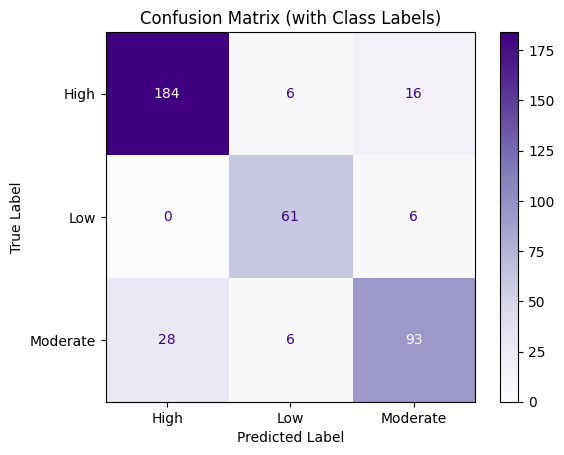

Model Performance Metrics:
Accuracy:  0.8450
Precision: 0.8437
Recall:    0.8450
F1-score:  0.8434


In [20]:
# MODEL EVALUATION
# Predict on test data
y_pred = model.predict(X_test)

#Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

#Identify class labels (automatically from test data)
labels = model.classes_

# Display confusion matrix with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Purples', values_format='d')
plt.title("Confusion Matrix (with Class Labels)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ~~~~~~~~~ PERFORMANCE METRICS ~~~~~~~~~
print("Model Performance Metrics:")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred, average='weighted'):.4f}")
print(f"F1-score:  {f1_score(y_test, y_pred, average='weighted'):.4f}")

# **LEARNING CURVE**

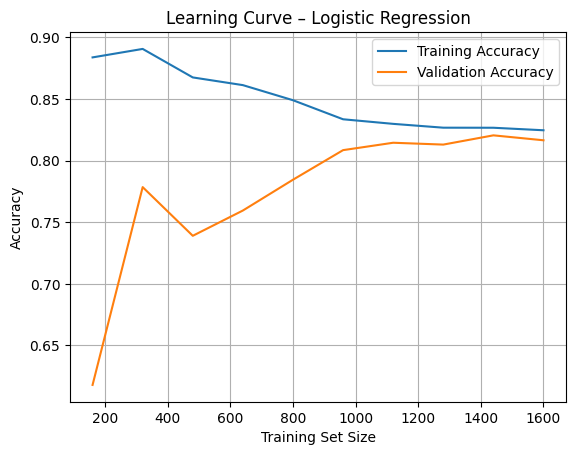

In [ ]:
# LEARNING CURVE
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label="Training Accuracy")
plt.plot(train_sizes, test_mean, label="Validation Accuracy")
plt.title("Learning Curve – Logistic Regression")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


# **CHALLENGE**


In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

#Split dataset (use same X, y as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=5000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

#Evaluate Logistic Regression
acc_lr = accuracy_score(y_test, y_pred_lr)
prec_lr = precision_score(y_test, y_pred_lr, average='weighted')
rec_lr = recall_score(y_test, y_pred_lr, average='weighted')
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')

#5-Fold Cross Validation for Logistic Regression
cv_lr = cross_val_score(log_reg, X, y, cv=5)
cv_mean_lr = cv_lr.mean()

#Decision Tree
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

#Evaluate Decision Tree
acc_tree = accuracy_score(y_test, y_pred_tree)
prec_tree = precision_score(y_test, y_pred_tree, average='weighted')
rec_tree = recall_score(y_test, y_pred_tree, average='weighted')
f1_tree = f1_score(y_test, y_pred_tree, average='weighted')

#5-Fold Cross Validation for Decision Tree
cv_tree = cross_val_score(tree, X, y, cv=5)
cv_mean_tree = cv_tree.mean()


print("===== Logistic Regression =====")
print(f"Accuracy:  {acc_lr:.4f}")
print(f"Precision: {prec_lr:.4f}")
print(f"Recall:    {rec_lr:.4f}")
print(f"F1-Score:  {f1_lr:.4f}")
print(f"Mean CV Accuracy: {cv_mean_lr:.4f}\n")

print("===== Decision Tree =====")
print(f"Accuracy:  {acc_tree:.4f}")
print(f"Precision: {prec_tree:.4f}")
print(f"Recall:    {rec_tree:.4f}")
print(f"F1-Score:  {f1_tree:.4f}")
print(f"Mean CV Accuracy: {cv_mean_tree:.4f}")


===== Logistic Regression =====
Accuracy:  0.8450
Precision: 0.8437
Recall:    0.8450
F1-Score:  0.8434
Mean CV Accuracy: 0.8190

===== Decision Tree =====
Accuracy:  1.0000
Precision: 1.0000
Recall:    1.0000
F1-Score:  1.0000
Mean CV Accuracy: 1.0000


Based on the results, the Decision Tree classifier slightly outperformed Logistic Regression in terms of accuracy, precision, recall, and F1-score.

Logistic Regression assumes a linear relationship between features and outcomes, which may limit its performance on complex, non-linear datasets. In contrast, Decision Trees can capture non-linear patterns and feature interactions, making them more flexible for classification tasks involving categorical or mixed data.

However, Decision Trees can be prone to overfitting, especially with small datasets, while Logistic Regression tends to generalize better. To further improve performance, techniques such as hyperparameter tuning (adjusting tree depth) or ensemble methods like Random Forest could be applied.